# РК 1

## Импортирование библиотек

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine

## Задача №13

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "обратная зависимость - 1 / X".

### Загрузка и первичный анализ данных

In [374]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [375]:
# Будем использовать только обучающую выборку
data = pd.read_csv('cars.csv', sep=",")

data.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


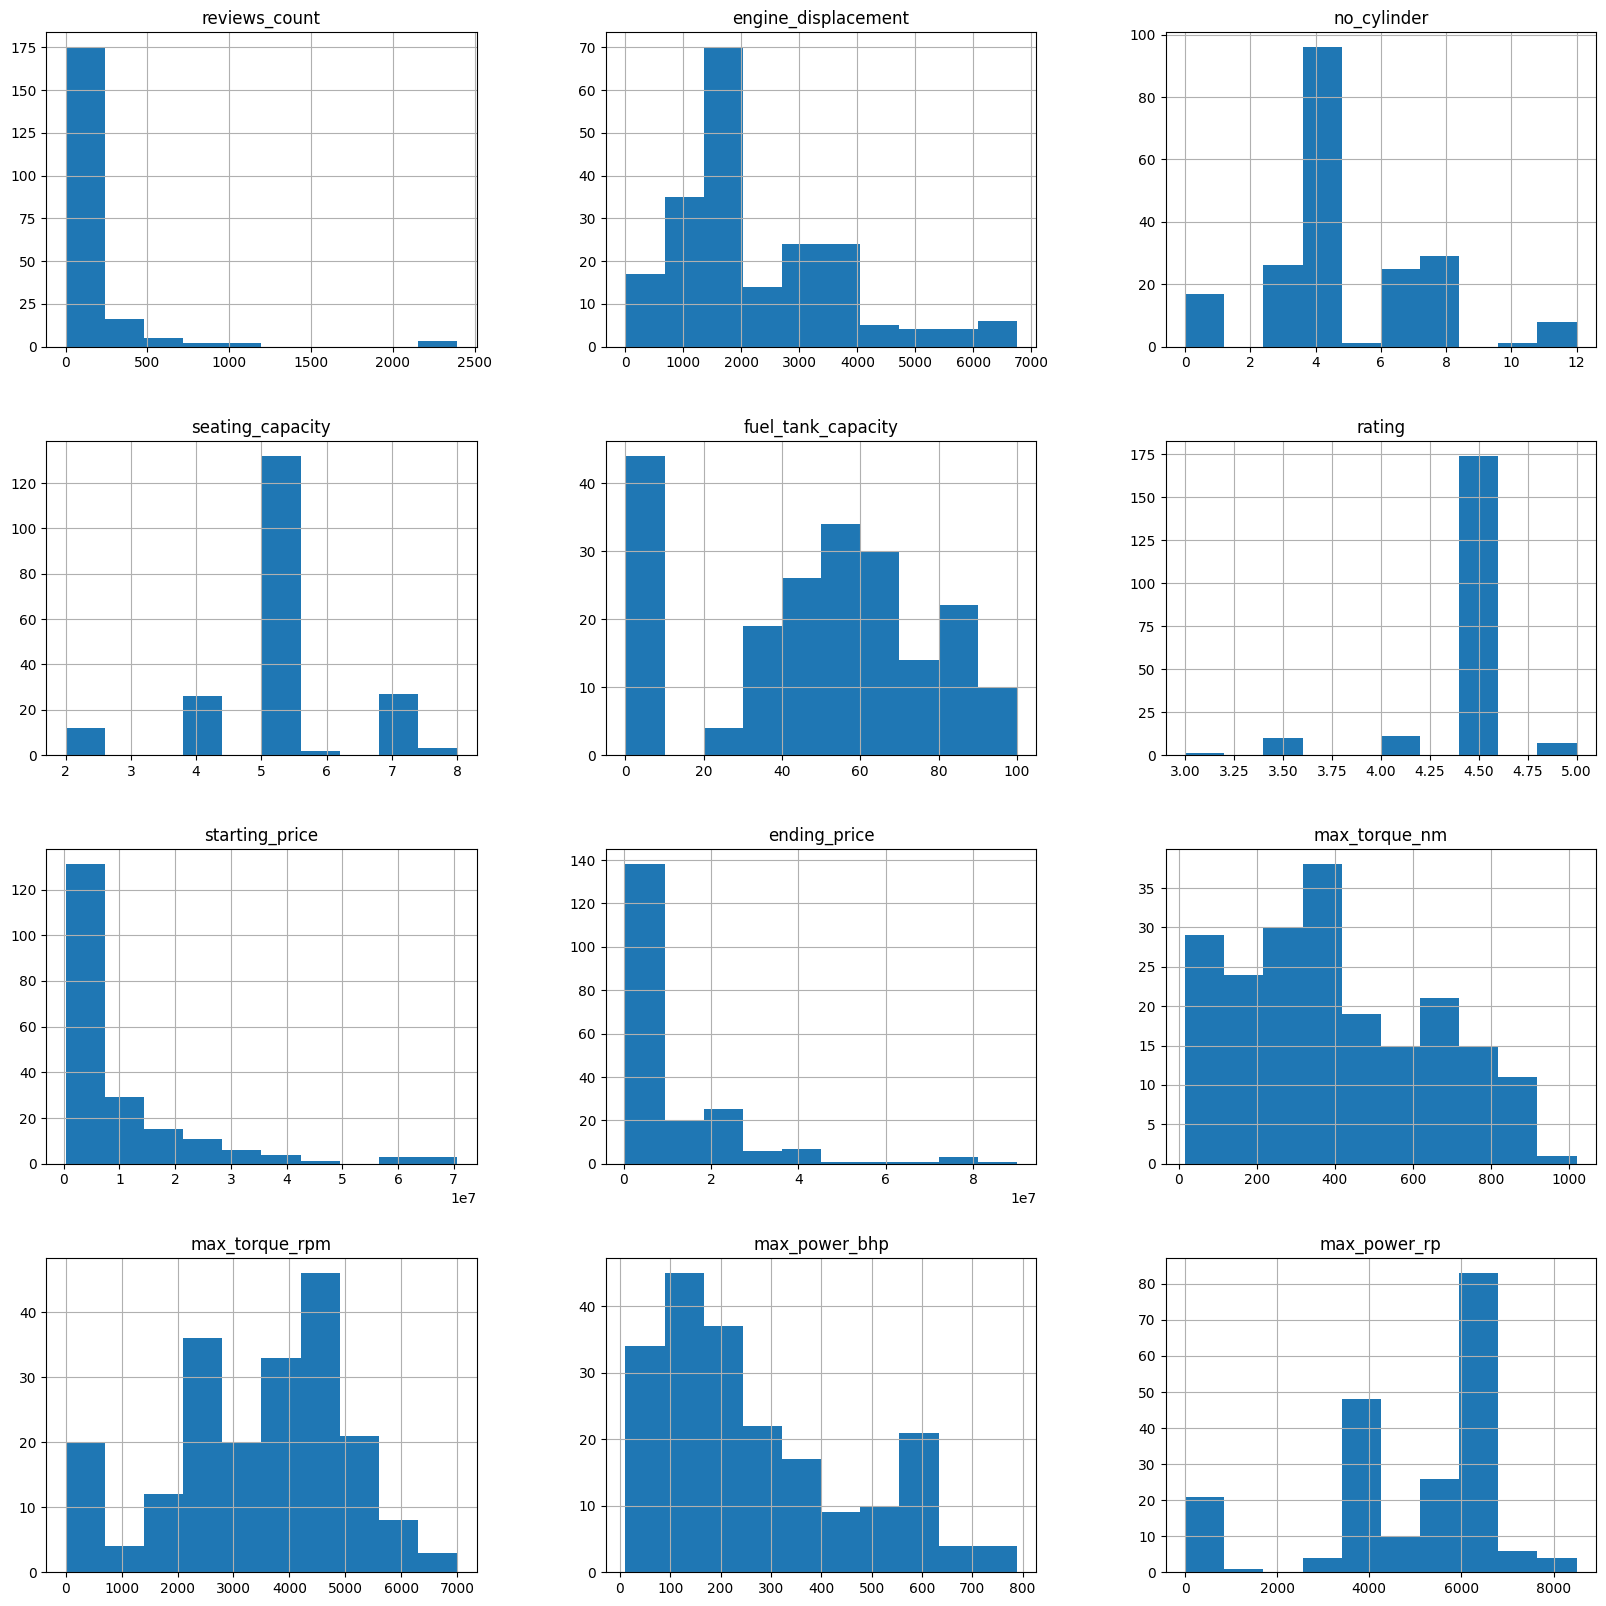

In [376]:
data.hist(figsize=(20,20))
plt.show()

### Исходное распределение

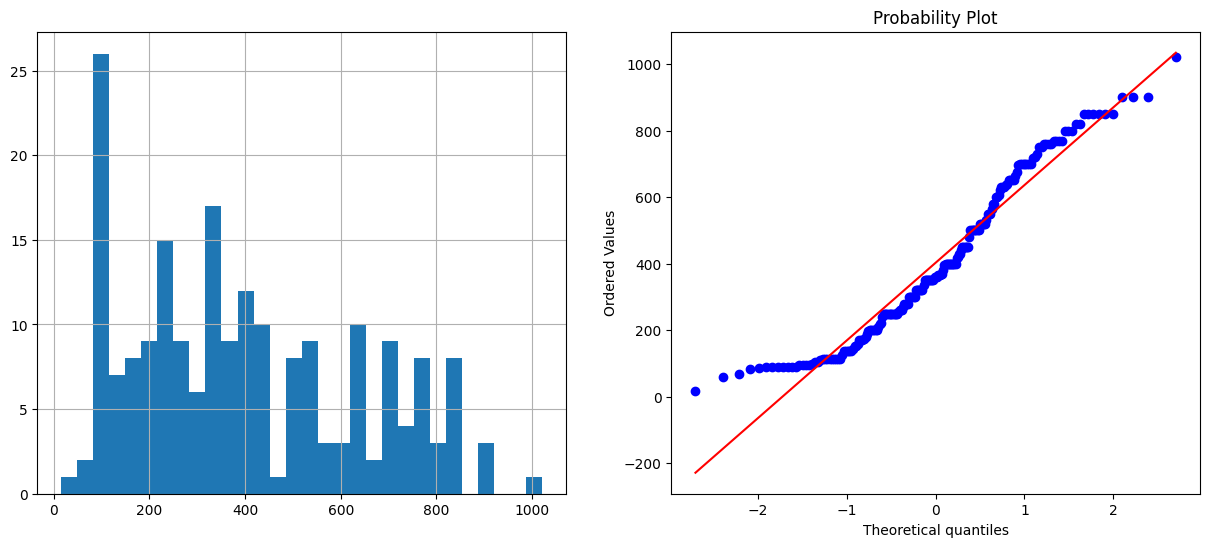

In [377]:
diagnostic_plots(data, 'max_torque_nm')

### Обратное преобразование

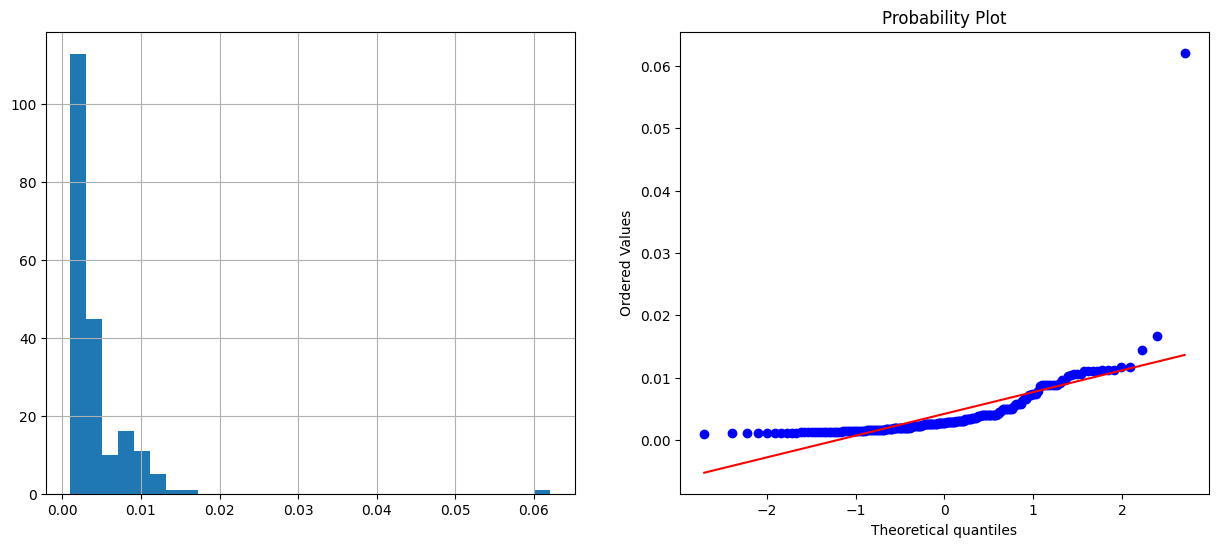

In [378]:
data['max_torque_nm_reciprocal'] = 1 / (data['max_torque_nm']) 
diagnostic_plots(data, 'max_torque_nm_reciprocal')

## Задача №33

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), алгоритм полного перебора (exhaustive feature selection).

### Загрузка и предобработка данных

In [379]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_feature_names = wine['feature_names']
wine_x_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

### Методы обертывания (wrapper methods)

In [380]:
knn = KNeighborsClassifier(n_neighbors=3)

In [381]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(wine_X, wine_y)
# efs1 = efs1.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 1079/1079

Best accuracy score: 0.94
Best subset (indices): (0, 5, 6, 9)
Best subset (corresponding names): ('0', '5', '6', '9')


In [382]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(wine_X, wine_y)
# efs2 = efs2.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 91/91

Best accuracy score: 0.93
Best subset (indices): (6, 9)
Best subset (corresponding names): ('6', '9')


### Доп задание

Для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.

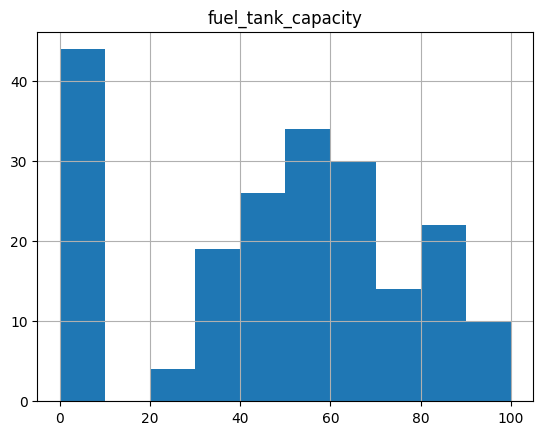

In [383]:
data.hist('fuel_tank_capacity')
plt.show()